### Exercise: Classification of types of rice

This exercise use the dataset provided at the following [link]
(https://archive.ics.uci.edu/dataset/59/letter+recognition).

You should first install the ucimlrepo (*pip install ucimlrepo*).

This example uses the 'Import example' source code.

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
letter_recognition = fetch_ucirepo(id=59) 
  
# data (as pandas dataframes) 
X = letter_recognition.data.features 
y = letter_recognition.data.targets 
  
# metadata 
print(letter_recognition.metadata) 
  
# variable information 
print(letter_recognition.variables) 


{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

### Check dataset

In [2]:
X.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
y

,lettr
0,T
1,I
2,D
3,N
4,G
...,...
19995,D
19996,C
19997,T
19998,S


What if we need to encode labels?

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

/opt/homebrew/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
print(y[:10])

[19  8  3 13  6 18  1  0  9 12]


In [6]:
print(le.inverse_transform(y[:10]))

['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M']


### Simple hold out (training-test only)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

import seaborn as sns

### Step 1: prepare dataset

In [8]:
# train_test proportion
test_proportion = 0.2

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = test_proportion, 
                                                    stratify = y,
                                                    shuffle = True)

# do we need to set the random state?

### Step 2: create models

In [9]:
lr = LogisticRegression()
per = Perceptron()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()

### Step 3: train the models

In [10]:
lr.fit(x_train, y_train)
per.fit(x_train, y_train)
knn.fit(x_train, y_train)
dt.fit(x_train, y_train)
svc.fit(x_train, y_train)
rf.fit(x_train, y_train)

print("")

/opt/homebrew/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Step 4: test the models

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [12]:
lr_pred = lr.predict(x_test)
per_pred = per.predict(x_test)
knn_pred = knn.predict(x_test)
dt_pred = dt.predict(x_test)
svc_pred = svc.predict(x_test)
rf_pred = rf.predict(x_test)

In [13]:
lr_f1 = f1_score(lr_pred, y_test, average="macro")
per_f1 = f1_score(per_pred, y_test, average="macro")
knn_f1 = f1_score(knn_pred, y_test, average="macro")
dt_f1 = f1_score(dt_pred, y_test, average="macro")
svc_f1 = f1_score(svc_pred, y_test, average="macro")
rf_f1 = f1_score(rf_pred, y_test, average="macro")

f1_results = [lr_f1, per_f1, knn_f1, dt_f1, svc_f1, rf_f1]

In [14]:
f1_results

[0.7653193261088197,
 0.4668513375439152,
 0.9587477041366832,
 0.8813780341691355,
 0.9348196921374423,
 0.9663428432758608]

Let's see the results on a plot

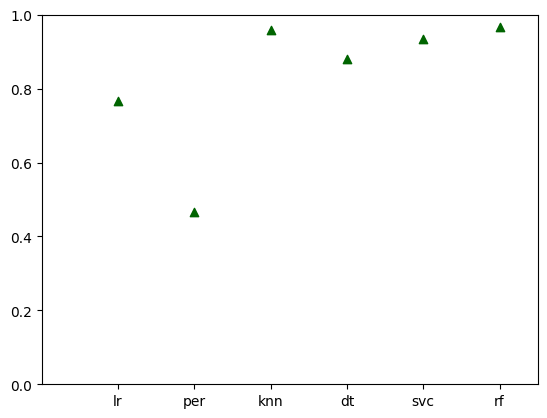

In [15]:
import matplotlib.pyplot as plt

ticks = [1, 2, 3, 4, 5, 6]
labels = ["lr", "per", "knn", "dt", "svc", "rf"]

fig = plt.figure() #Step 2
ax = fig.add_subplot(111) #Step 3
ax.scatter(ticks,
           f1_results,
          color= 'darkgreen',
          marker= '^' )
ax.set_ylim(0, 1)
ax.set_xlim(0, 6.5)
ax.set_xticks(ticks, labels)
plt.savefig('foo2.png' ) #Step 5
plt.show() #Step 6

### "Simple" K-fold cross validation (no test)

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

num_folds = 3

k_fold = KFold(n_splits = num_folds, 
               shuffle = True, 
               random_state=1)

# do we need random seed?

In [17]:
cv_lr = cross_validate(estimator = lr, 
                       X = X, 
                       y = y, 
                       cv = k_fold, 
                       scoring = ('f1_macro'), 
                       return_train_score = False)

cv_per = cross_validate(estimator = per, X = X, y = y, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)
cv_knn = cross_validate(estimator = knn, X = X, y = y, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)
cv_dt = cross_validate(estimator = dt, X = X, y = y, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)
cv_svc = cross_validate(estimator = svc, X = X, y = y, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)
cv_rf = cross_validate(estimator = rf, X = X, y = y, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)

/opt/homebrew/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [18]:
import pandas as pd

f1_perf = pd.DataFrame({
  'Model': ['lr'] * num_folds + ['per'] * num_folds + ['knn'] * num_folds + ['dt'] * num_folds + ['svc'] * num_folds + ['rf'] * num_folds,
  'Performance': list(cv_lr['test_score']) + list(cv_per['test_score']) + list(cv_knn['test_score']) + list(cv_dt['test_score']) + list(cv_svc['test_score']) + list(cv_rf['test_score'])
})



In [19]:
#f1_perf

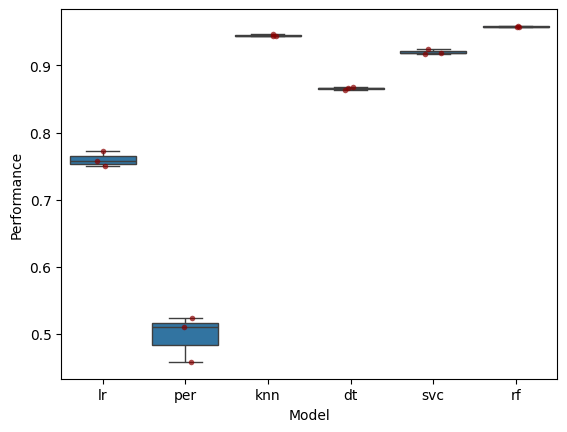

In [20]:
fig = plt.figure() #Step 2
ax = fig.add_subplot(111) #Step 3
sns.boxplot(data = f1_perf, x='Model', y='Performance')
sns.stripplot(data = f1_perf, x='Model', y='Performance', color='darkred', size=4, alpha=0.7)

#ax.set(ylim = (0.8, 1.0))

plt.show()

In [21]:
from scipy.stats import wilcoxon

model_1 = "dt"
model_2 = "svc"

# perform Wilcoxon signed-rank test
wilcoxon_stat, wilcoxon_pval = wilcoxon(f1_perf[f1_perf['Model'] == model_1]['Performance'], 
                                        f1_perf[f1_perf['Model'] == model_2]['Performance'], 
                                        alternative = 'two-sided', 
                                        zero_method = 'wilcox', 
                                        correction = True,
                                        mode = 'approx')


/opt/homebrew/lib/python3.12/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


In [22]:
# display test results
print("Wilcoxon Signed-Rank Test:")
print(f"p-value: {wilcoxon_pval}")


Wilcoxon Signed-Rank Test:
p-value: 0.18144920772142048


### K-fold cross validation (with test)

In [23]:
# train_test proportion
test_proportion = 0.2

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = test_proportion, 
                                                    stratify = y,
                                                    shuffle = True,
                                                    random_state = 11
                                                   )

# do we need to set the random state?

In [24]:
#train validation proportion
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

num_folds = 3

k_fold = KFold(n_splits = num_folds, 
               shuffle = True, 
               random_state=1)

# do we need random seed?

Try a different solver for Logistic Regression

In [25]:
lr = LogisticRegression(max_iter=100, solver="liblinear")

In [26]:
cv_lr = cross_validate(estimator = lr, 
                       X = x_train, 
                       y = y_train, 
                       cv = k_fold, 
                       scoring = ('f1_macro'), 
                       return_train_score = False)


In [27]:
cv_per = cross_validate(estimator = per, X = x_train, y = y_train, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)
cv_knn = cross_validate(estimator = knn, X = x_train, y = y_train, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)
cv_dt = cross_validate(estimator = dt, X = x_train, y = y_train, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)
cv_svc = cross_validate(estimator = svc, X = x_train, y = y_train, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)
cv_rf = cross_validate(estimator = rf, X = x_train, y = y_train, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)

In [28]:
import pandas as pd

f1_perf = pd.DataFrame({
  'Model': ['lr'] * num_folds + ['per'] * num_folds + ['knn'] * num_folds + ['dt'] * num_folds + ['svc'] * num_folds + ['rf'] * num_folds,
  'Performance': list(cv_lr['test_score']) + list(cv_per['test_score']) + list(cv_knn['test_score']) + list(cv_dt['test_score']) + list(cv_svc['test_score']) + list(cv_rf['test_score'])
})



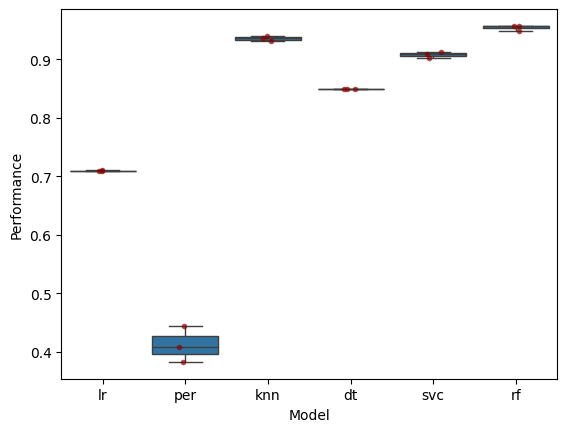

In [29]:
fig = plt.figure() #Step 2
ax = fig.add_subplot(111) #Step 3
sns.boxplot(data = f1_perf, x='Model', y='Performance')
sns.stripplot(data = f1_perf, x='Model', y='Performance', color='darkred', size=4, alpha=0.7)

#ax.set(ylim = (0.8, 1.0))

plt.show()

In [30]:
from scipy.stats import wilcoxon

model_1 = "rf"
model_2 = "knn"

# perform Wilcoxon signed-rank test
wilcoxon_stat, wilcoxon_pval = wilcoxon(f1_perf[f1_perf['Model'] == model_1]['Performance'], 
                                        f1_perf[f1_perf['Model'] == model_2]['Performance'], 
                                        alternative = 'two-sided', 
                                        zero_method = 'wilcox', 
                                        correction = True,
                                        mode = 'approx')


/opt/homebrew/lib/python3.12/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


Let's try to increase the number of folds on the best models

In [31]:
#train validation proportion
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

num_folds = 5

k_fold = KFold(n_splits = num_folds, 
               shuffle = True, 
               random_state=1)

# do we need random seed?

In [32]:
cv_knn = cross_validate(estimator = knn, X = x_train, y = y_train, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)
cv_svc = cross_validate(estimator = svc, X = x_train, y = y_train, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)
cv_rf = cross_validate(estimator = rf, X = x_train, y = y_train, cv = k_fold, scoring = ('f1_macro'), return_train_score = False)

In [33]:
f1_perf = pd.DataFrame({
  'Model': ['knn'] * num_folds + ['svc'] * num_folds + ['rf'] * num_folds,
  'Performance': list(cv_knn['test_score']) + list(cv_svc['test_score']) + list(cv_rf['test_score'])
})



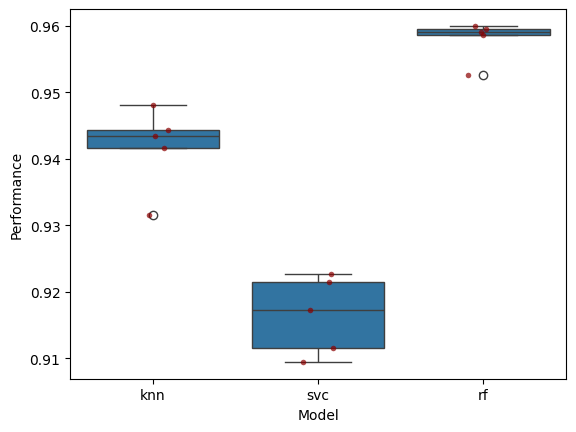

In [34]:
fig = plt.figure() #Step 2
ax = fig.add_subplot(111) #Step 3
sns.boxplot(data = f1_perf, x='Model', y='Performance')
sns.stripplot(data = f1_perf, x='Model', y='Performance', color='darkred', size=4, alpha=0.7)

#ax.set(ylim = (0.8, 1.0))

plt.show()

In [35]:
from scipy.stats import wilcoxon

model_1 = "rf"
model_2 = "svc"

# perform Wilcoxon signed-rank test
wilcoxon_stat, wilcoxon_pval = wilcoxon(f1_perf[f1_perf['Model'] == model_1]['Performance'], 
                                        f1_perf[f1_perf['Model'] == model_2]['Performance'], 
                                        alternative = 'two-sided', 
                                        zero_method = 'wilcox', 
                                        correction = False,
                                        mode = 'auto')


### Stop here and decide the alpha value

In [36]:
# display test results
print("Wilcoxon Signed-Rank Test:")
print(f"p-value: {wilcoxon_pval}")


Wilcoxon Signed-Rank Test:
p-value: 0.0625


In [37]:
f1_perf[f1_perf['Model'] == model_1]['Performance']

10    0.952630
11    0.959075
12    0.959587
13    0.958671
14    0.960008
Name: Performance, dtype: float64

In [38]:
f1_perf[f1_perf['Model'] == model_2]['Performance']

5    0.909485
6    0.917357
7    0.921533
8    0.922639
9    0.911595
Name: Performance, dtype: float64

In [39]:
l1 = [0.95]
l2 = [0.91]

wilcoxon(x = l1, y = l2)

WilcoxonResult(statistic=0.0, pvalue=1.0)

### decide for the best model

Let's say that the best model is Random Forest, but since our computational power is limited allows us to run experiments with knn only.

### Train the best model on the whole training set

In [40]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

### test the best model on the test set

In [41]:
test_knn = knn.predict(x_test)

In [42]:
f1_score(y_test, test_knn, average="macro")

0.955836052350089

In [43]:
np.max(cv_knn["test_score"])

NameError: name 'np' is not defined

Do you really want to try if Random Forest performs better if trained on the whole dataset?

In [ ]:
rf.fit(x_train, y_train)
test_rf = rf.predict(x_test)
f1_score(y_test, test_rf, average="macro")

0.9661965094786742